## Student Performance Indicator

### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1) Problem statement

<p>This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

<p>Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

2.2 Dataset information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

3.0 Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

3.1 Check Missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

3.2 Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

3.3 Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [28]:
categorical_columns = df.iloc[:,:5].columns
categorical_columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [29]:
for cat in categorical_columns:
    print(" ")
    print(f"Categories in {cat} :")
    print(df[cat].unique())

 
Categories in gender :
['female' 'male']
 
Categories in race_ethnicity :
['group B' 'group C' 'group A' 'group D' 'group E']
 
Categories in parental_level_of_education :
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
Categories in lunch :
['standard' 'free/reduced']
 
Categories in test_preparation_course :
['none' 'completed']


In [36]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O" ]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O" ]
print(f"numerical_feature : {numerical_feature}") 
print(" ")
print(f"categorical_feature : {categorical_feature}") 



numerical_feature : ['math_score', 'reading_score', 'writing_score']
 
categorical_feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total Score" and "Average"

In [57]:
df["Total Score"] = df[numerical_feature].sum(axis=1)
df["Average"] = round(df["Total Score"]/len(numerical_feature),0)

In [60]:
df = df.drop("Percentage", axis=1)

In [61]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


Out of Marks

In [69]:
for cat in numerical_feature:
    count = df[df[cat] == 100]["Average"].count()
    print(f"Out of score in {cat.replace("_score","")} → {count} students")


Out of score in math → 7 students
Out of score in reading → 17 students
Out of score in writing → 14 students


In [72]:
for cat in numerical_feature:
    count = df[df[cat] <=35]["Average"].count()
    print(f"Failed in {cat.replace("_score","")} → {count} students")


Failed in math → 27 students
Failed in reading → 15 students
Failed in writing → 18 students


Insight

* From above we can say Student dont like Maths, they more like reading

4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

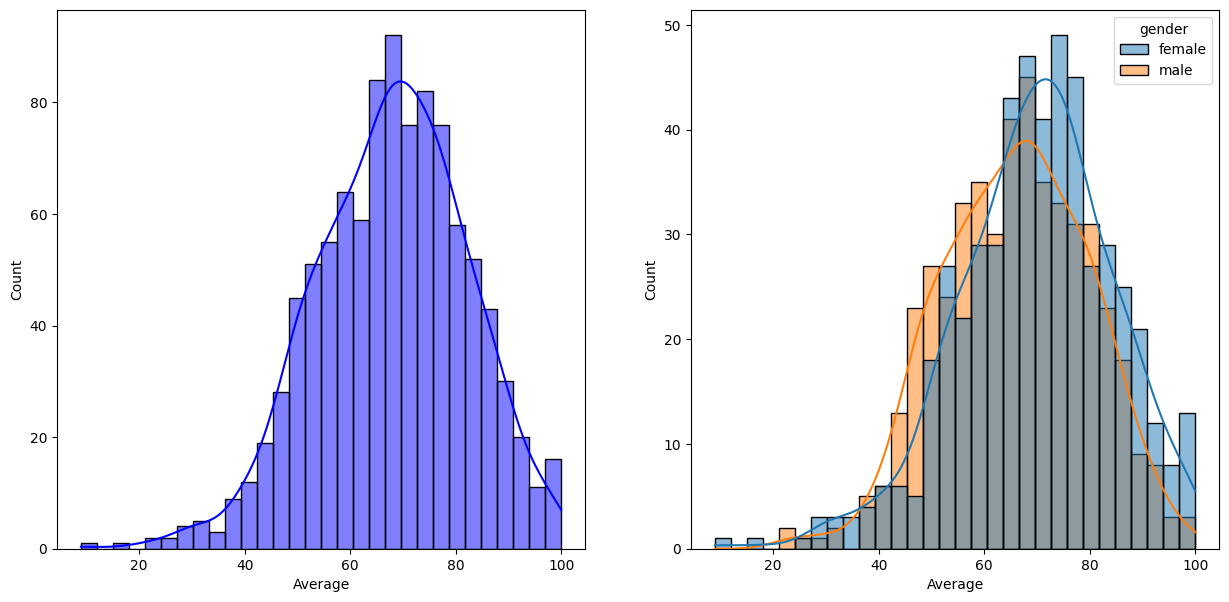

In [78]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="Average", bins=30, kde=True, color="b")
plt.subplot(122)
sns.histplot(data=df, x="Average", bins=30, kde=True, hue="gender")
plt.show()


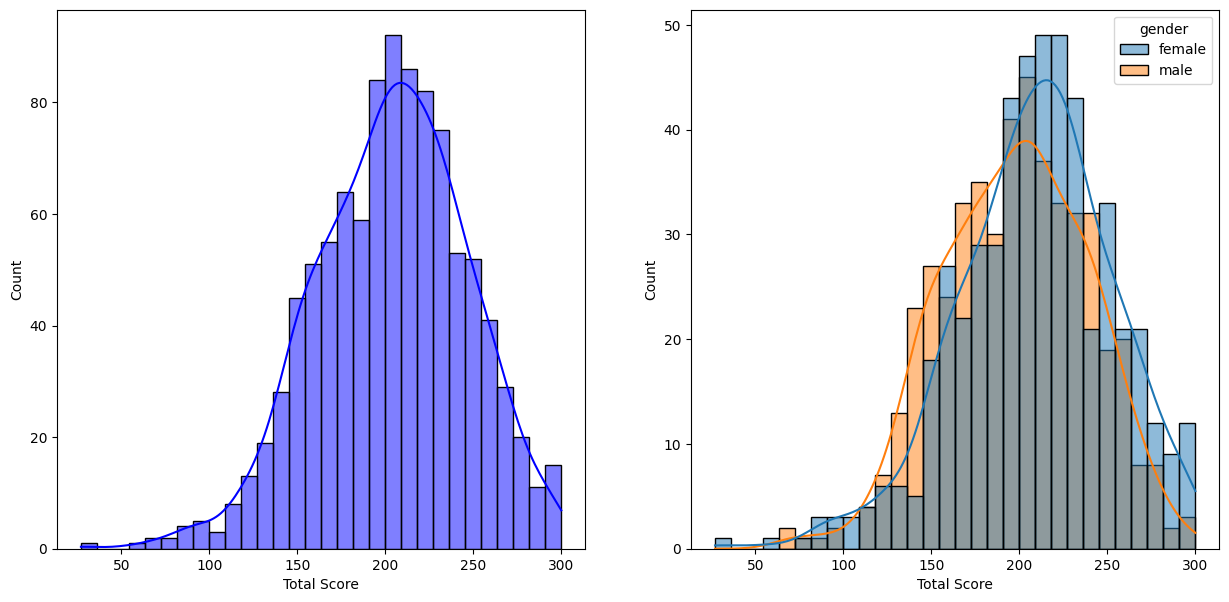

In [79]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="Total Score", bins=30, kde=True, color="b")
plt.subplot(122)
sns.histplot(data=df, x="Total Score", bins=30, kde=True, hue="gender")
plt.show()


Insight

* Females are well performed in average and total score

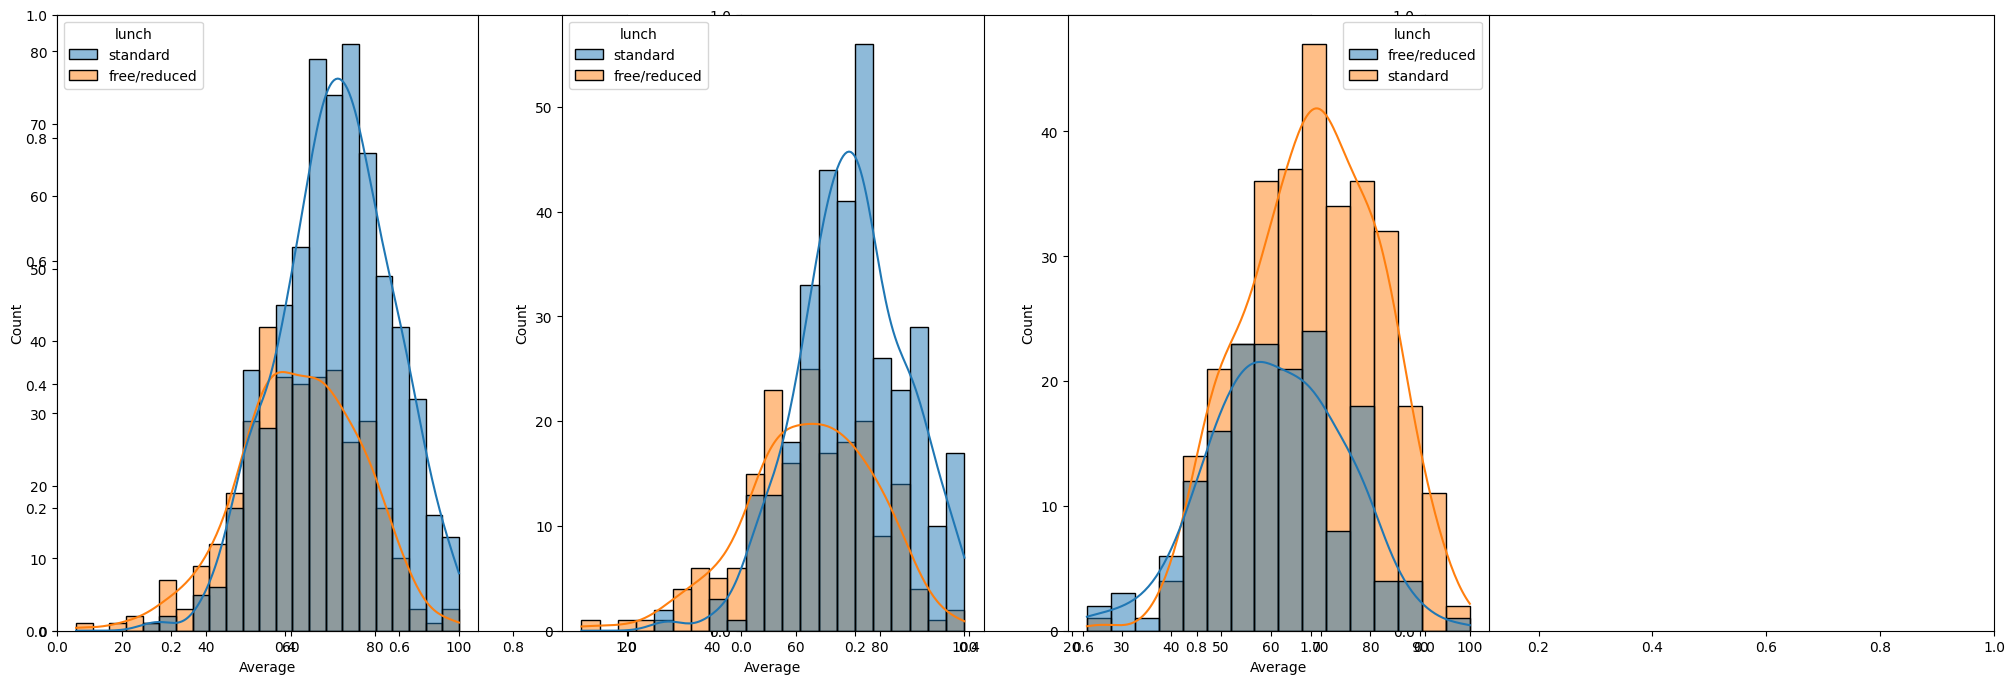

In [88]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Insights

* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

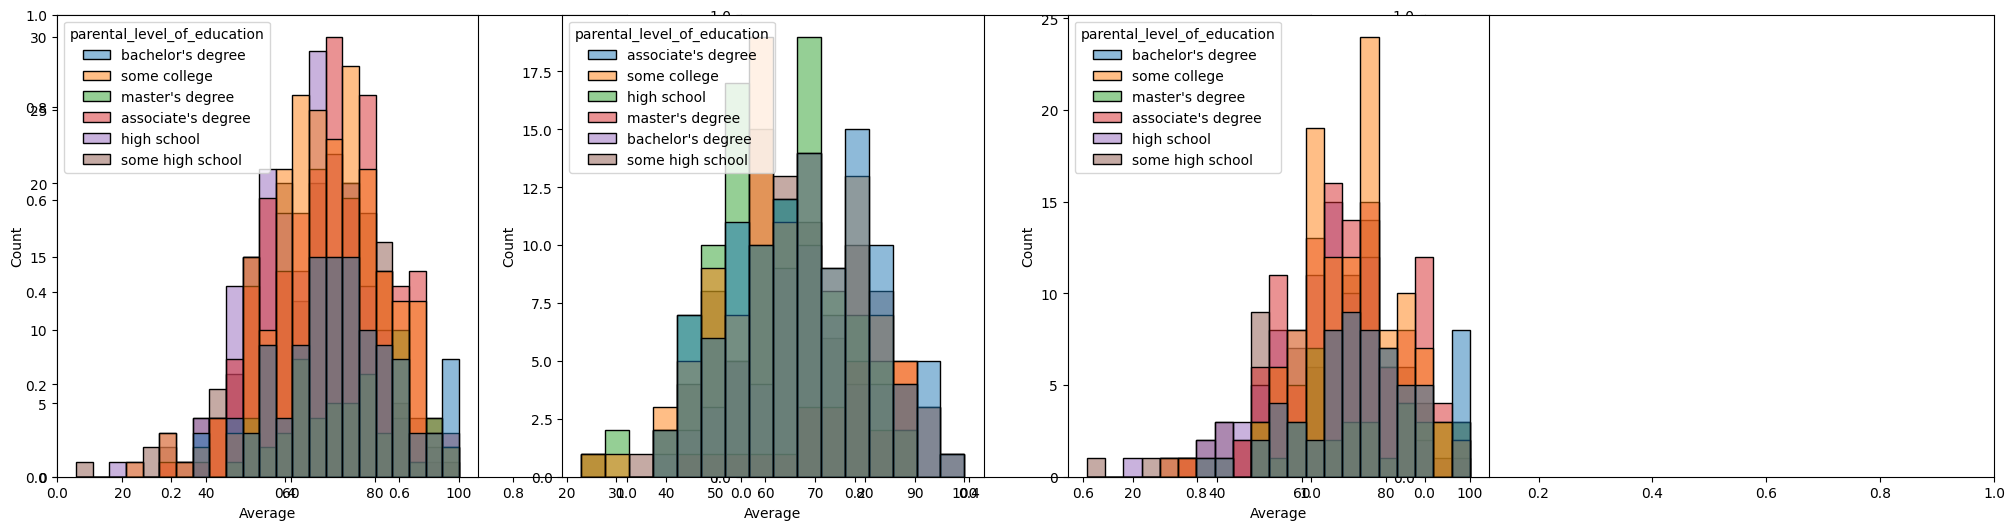

In [99]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',hue=categorical_feature[2])
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',hue=categorical_feature[2])
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',hue=categorical_feature[2])
plt.show()

Insights

* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

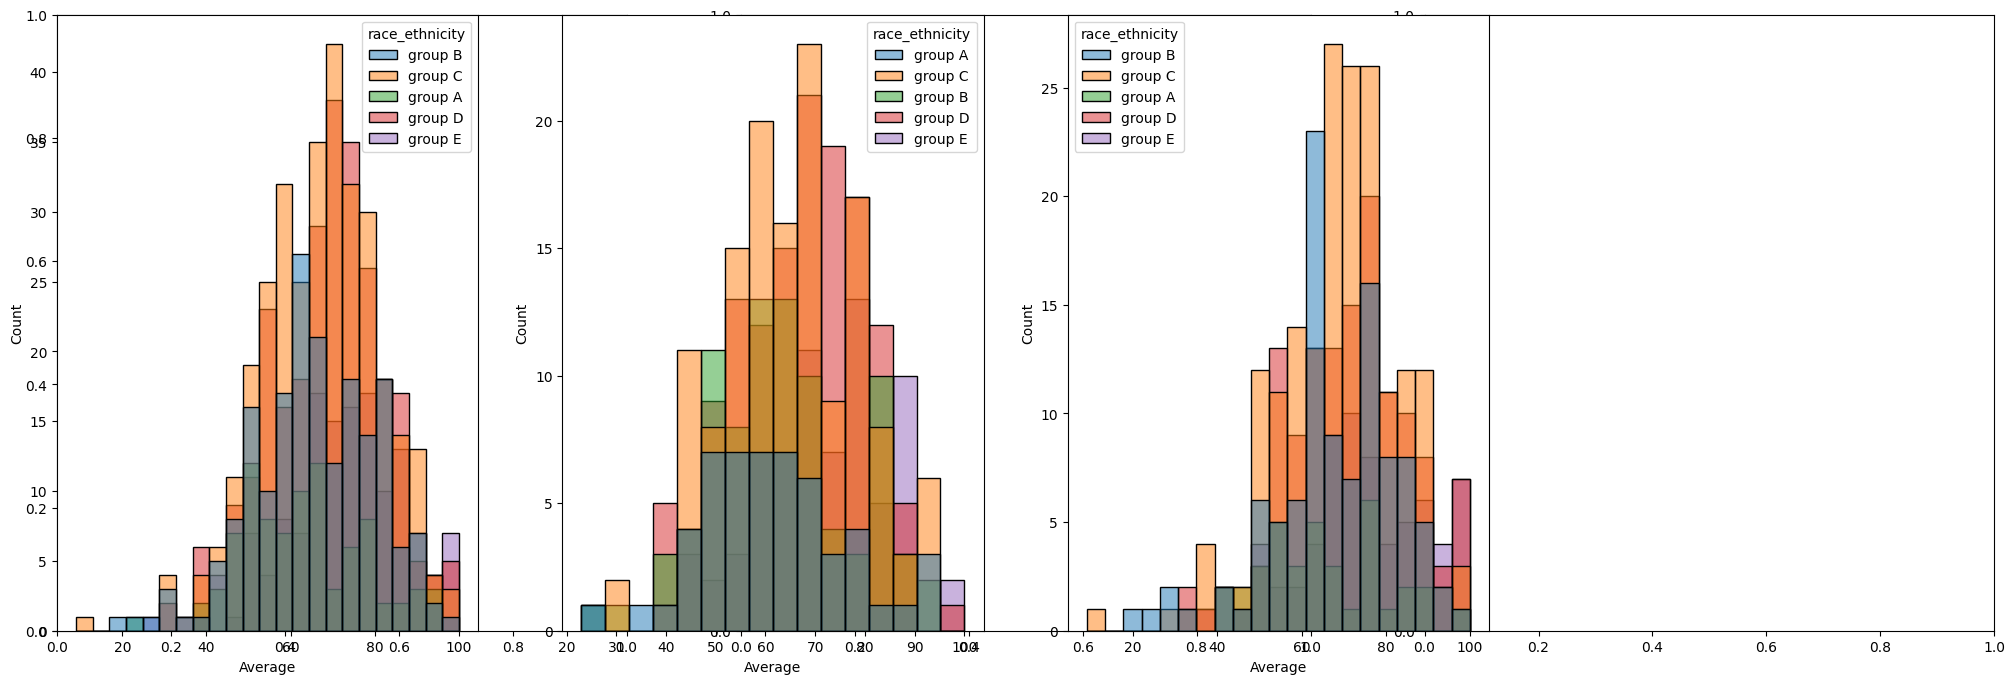

In [104]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',hue=categorical_feature[1])
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',hue=categorical_feature[1])
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',hue=categorical_feature[1])
plt.show()

Insights

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximumum score of students in all three subjects

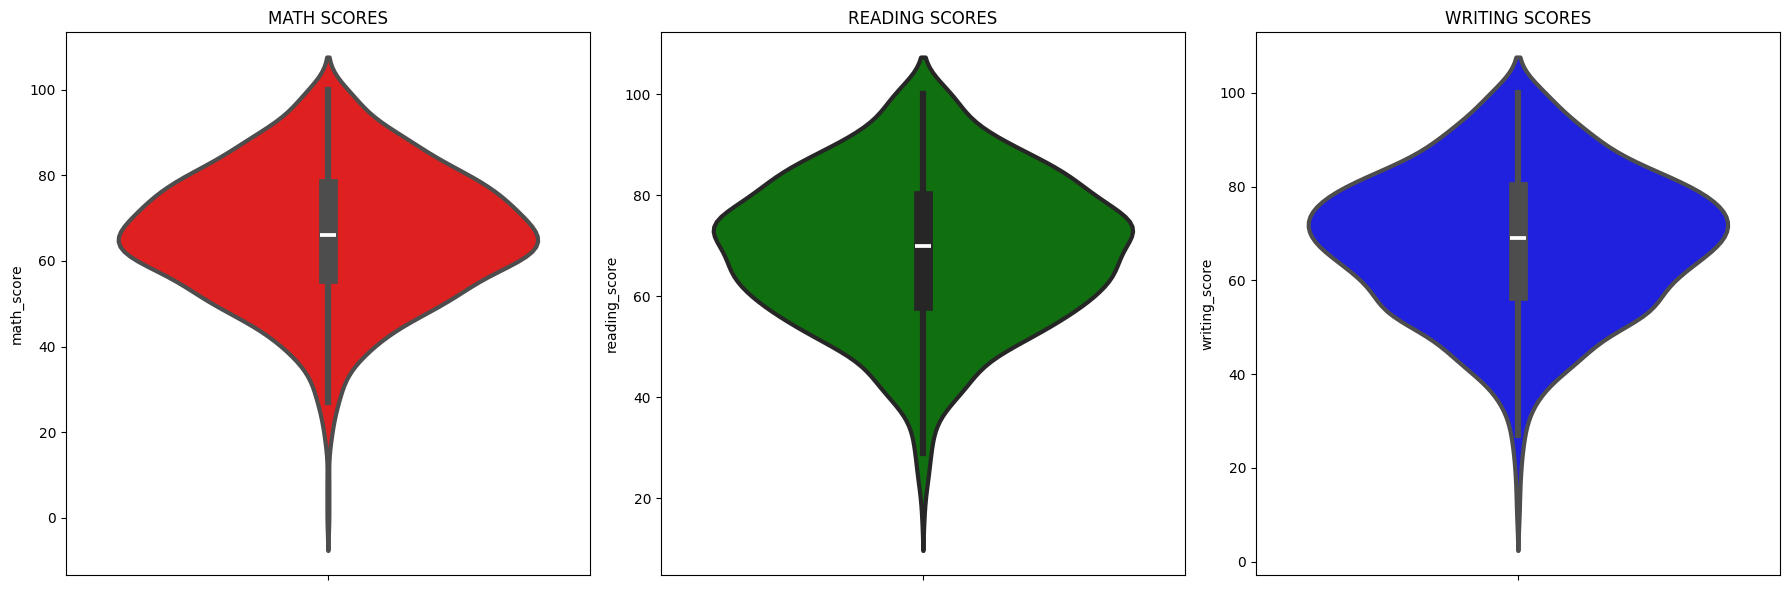

In [109]:
plt.figure(figsize=(18, 6))

# Math
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y=numerical_feature[0], data=df, color='red', linewidth=3)

# Reading
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y=numerical_feature[1], data=df, color='green', linewidth=3)

# Writing
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y=numerical_feature[2], data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()


Insights

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in  reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot

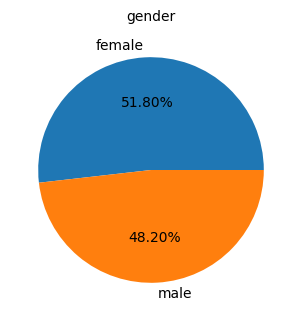

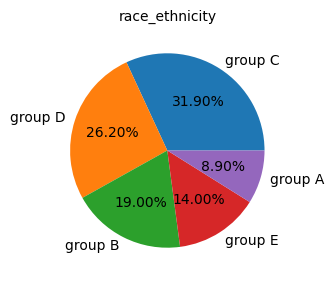

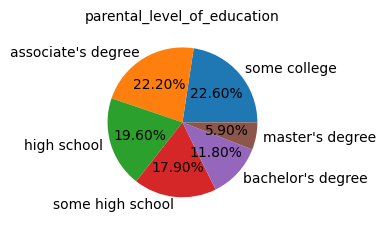

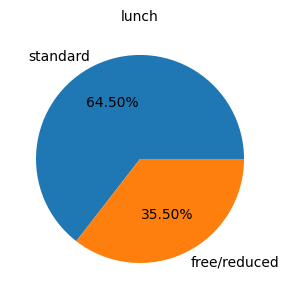

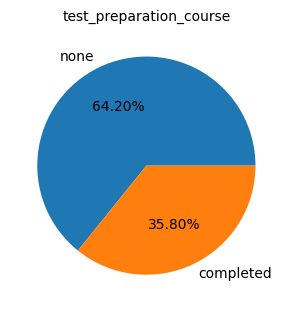

In [118]:
for cat in categorical_feature:
        plt.rcParams['figure.figsize'] = (15, 6)
        plt.subplot(1, 5, 1)
        size = df[cat].value_counts()
        plt.pie(size, labels=size.index, autopct='%.2f%%')
        plt.title(cat, fontsize=10)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

Insights

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

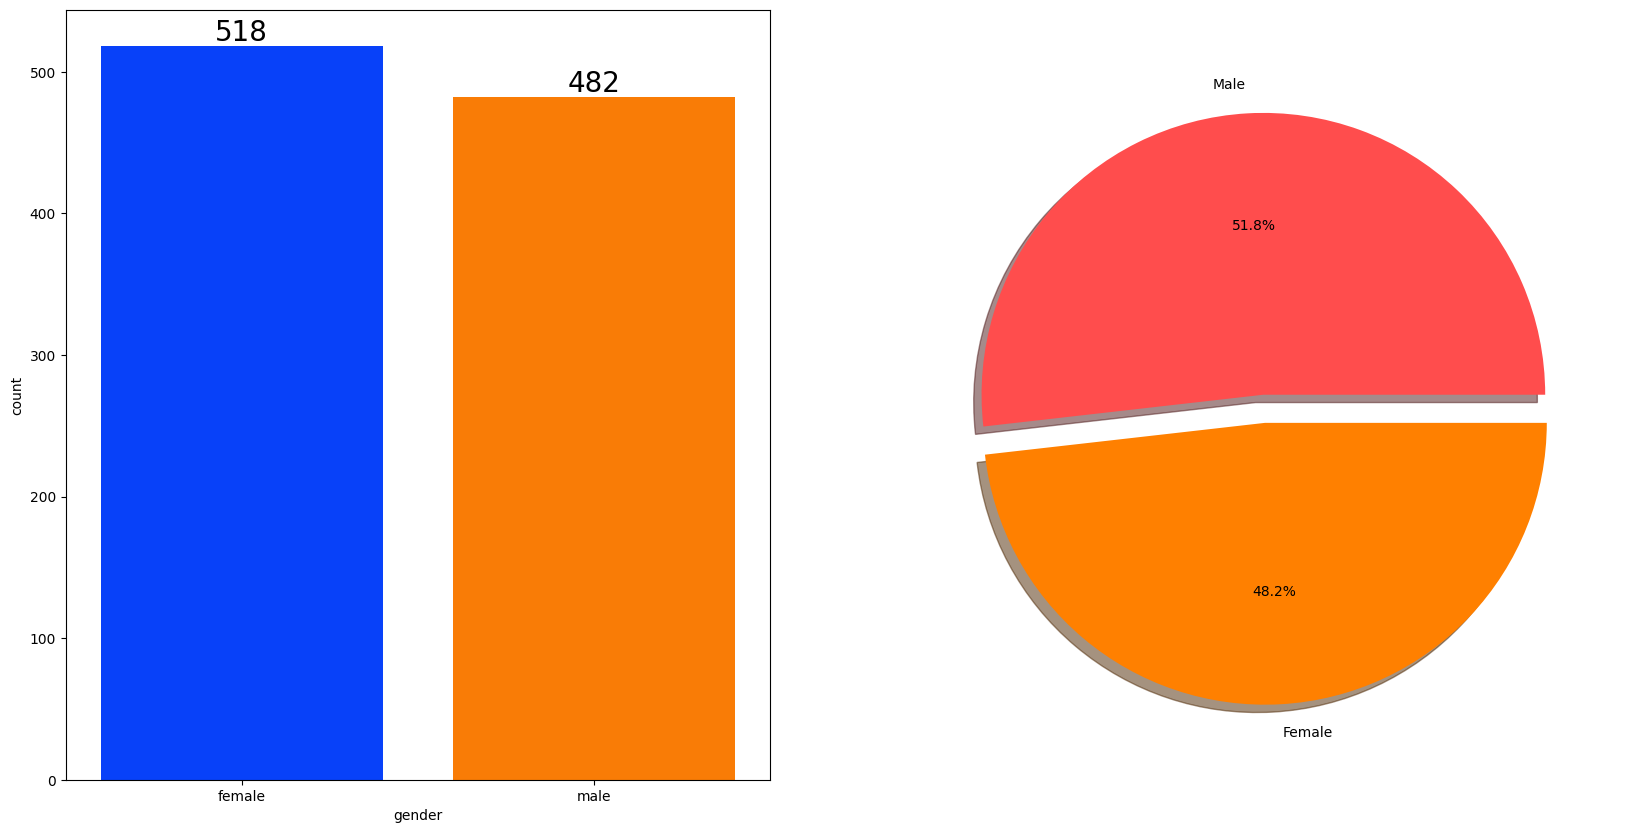

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )